In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from SUBHASISH import *

In [9]:
# Load the dataset
file_path = "Data/popularity.csv"
df = pd.read_csv(file_path)

In [25]:
df.head(5)[['shares', 'n_tokens_title', 'n_tokens_content', 'num_imgs', 'num_videos', 'average_token_length']]

,shares,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length
0,593,12.0,219.0,1.0,0.0,4.680365
1,711,9.0,255.0,1.0,0.0,4.913725
2,1500,9.0,211.0,1.0,0.0,4.393365
3,1200,9.0,531.0,1.0,0.0,4.404896
4,505,13.0,1072.0,20.0,0.0,4.682836


In [11]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [12]:
# Trim whitespace from column names
df.columns = df.columns.str.strip()

In [13]:
# Extract the 'shares' column
shares = df['shares']
shares

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64

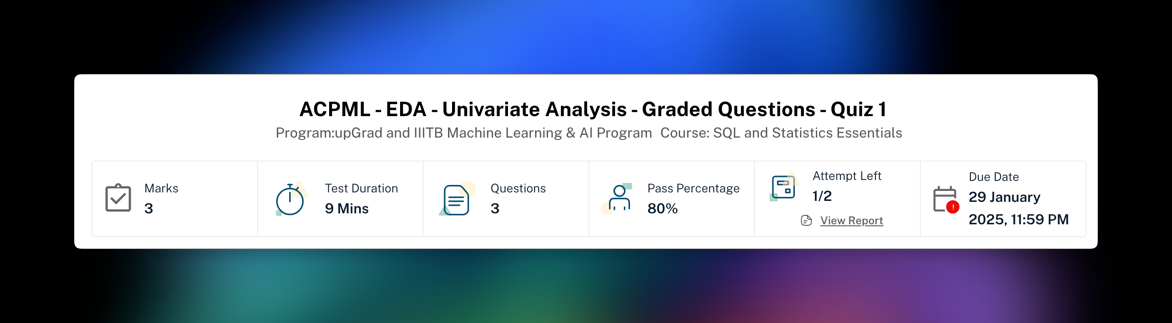

In [38]:
ShowImage("/Users/subhasishbiswas/GIT/Interstellar/UpGrad/Code/Images/CleanShot 2025-01-29 at 22.51.44.png")

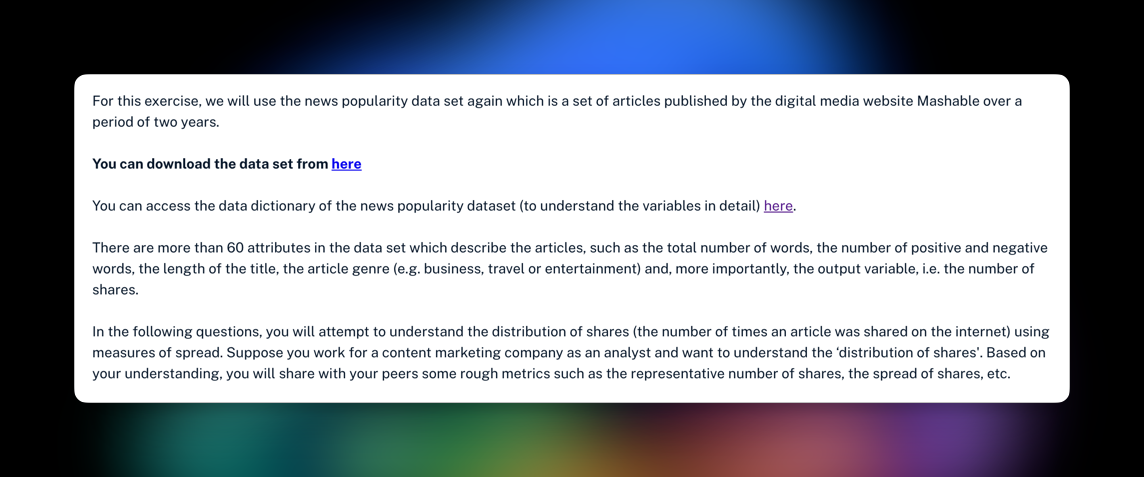

In [39]:
ShowImage("/Users/subhasishbiswas/GIT/Interstellar/UpGrad/Code/Images/CleanShot 2025-01-29 at 22.52.56.png")

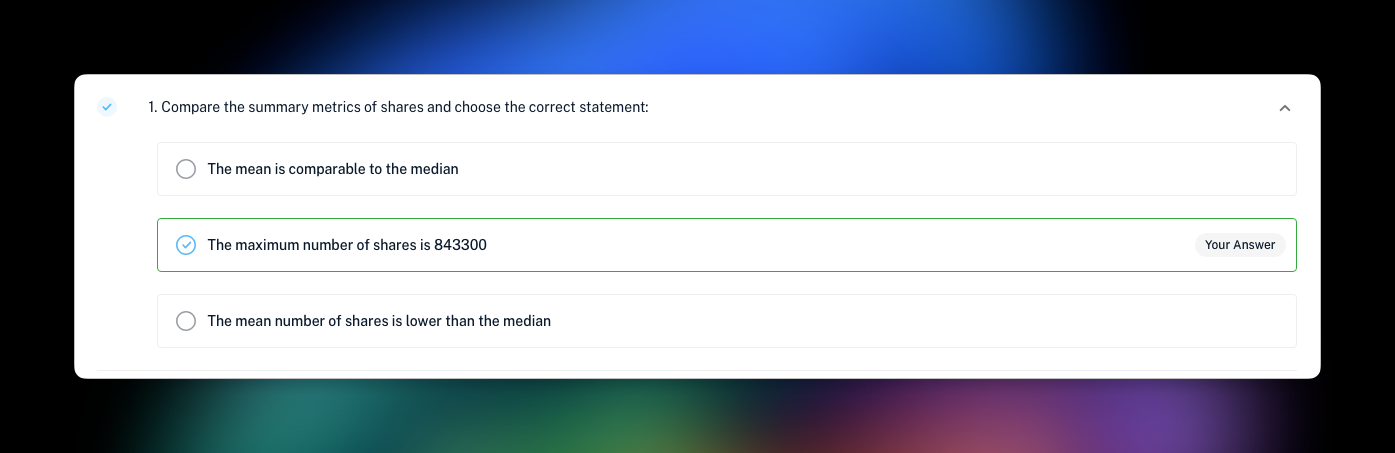

In [23]:
ShowImage("/Users/subhasishbiswas/GIT/Interstellar/UpGrad/Code/Images/CleanShot 2025-01-29 at 17.44.30.png")

In [14]:
# Compute summary statistics for the 'shares' column
summary_stats = {
    "Mean": np.mean(shares),  # Calculate the mean of shares
    "Median": np.median(shares),  # Calculate the median of shares
    "Standard Deviation": np.std(shares),  # Calculate the standard deviation of shares
    "Min": np.min(shares),  # Find the minimum value of shares
    "Max": np.max(shares),  # Find the maximum value of shares
    "Q1 (25th Percentile)": np.percentile(shares, 25),  # Calculate the 25th percentile (Q1) of shares
    "Q3 (75th Percentile)": np.percentile(shares, 75),  # Calculate the 75th percentile (Q3) of shares
    "Interquartile Range (IQR)": np.percentile(shares, 75) - np.percentile(shares, 25)  # Calculate the interquartile range (IQR) of shares
}

In [15]:
# Print summary statistics
for key, value in summary_stats.items():
    print(f"{key}: {value}")

Mean: 3395.3801836343455
Median: 1400.0
Standard Deviation: 11626.804105728816
Min: 1
Max: 843300
Q1 (25th Percentile): 946.0
Q3 (75th Percentile): 2800.0
Interquartile Range (IQR): 1854.0


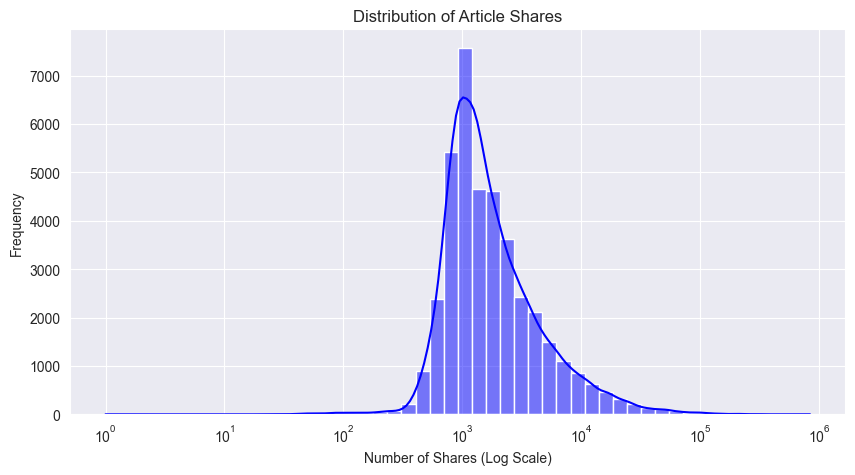

In [17]:
# Plot histogram of shares (log-scaled for better visibility)
plt.figure(figsize=(10, 5))
sns.histplot(shares, bins=50, kde=True, color='blue', log_scale=True)
plt.xlabel("Number of Shares (Log Scale)")
plt.ylabel("Frequency")
plt.title("Distribution of Article Shares")
plt.show()


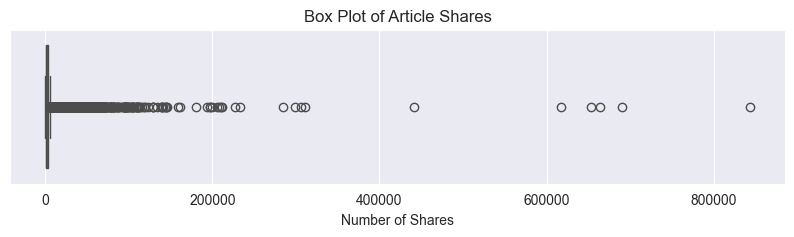

In [18]:
# Plot box plot to visualize outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=shares, color='red')
plt.xlabel("Number of Shares")
plt.title("Box Plot of Article Shares")
plt.show()

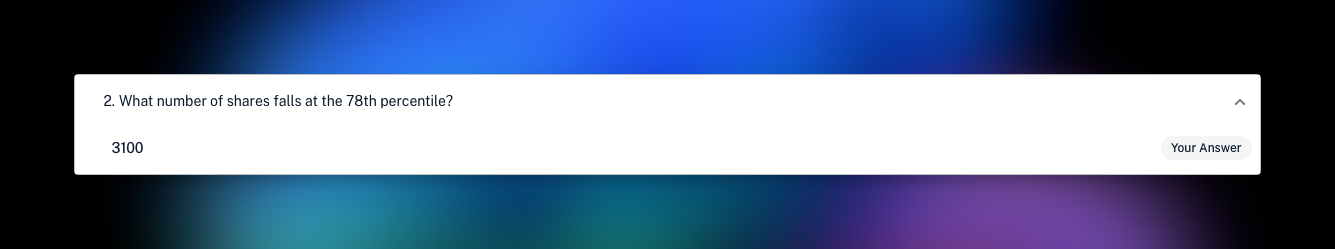

In [21]:
ShowImage("/Users/subhasishbiswas/GIT/Interstellar/UpGrad/Code/Images/CleanShot 2025-01-29 at 17.45.14.png")

In [12]:
import numpy as np

# Compute the 78th percentile of the shares distribution
percentile_78 = np.percentile(shares, 78)

# Print the result
print(f"The 78th percentile of article shares is: {percentile_78}")

The 78th percentile of article shares is: 3100.0


In [17]:
# Compute 95% confidence interval for the mean

# Set the confidence level
confidence_level = 0.95

# Calculate the sample size
n = len(shares)

# Calculate the mean of the shares
mean_shares = np.mean(shares)

# Calculate the sample standard deviation of the shares
std_shares = np.std(shares, ddof=1)

# Compute the standard error of the mean
standard_error = std_shares / np.sqrt(n)

# Compute the margin of error using the t-distribution
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, df=n-1) * standard_error

# Compute the lower bound of the confidence interval
lower_bound = mean_shares - margin_of_error

# Compute the upper bound of the confidence interval
upper_bound = mean_shares + margin_of_error

# Print the confidence interval for the mean number of shares
print(f"The mean number of shares lies between {lower_bound:.2f} and {upper_bound:.2f}")

The mean number of shares lies between 3280.92 and 3509.84


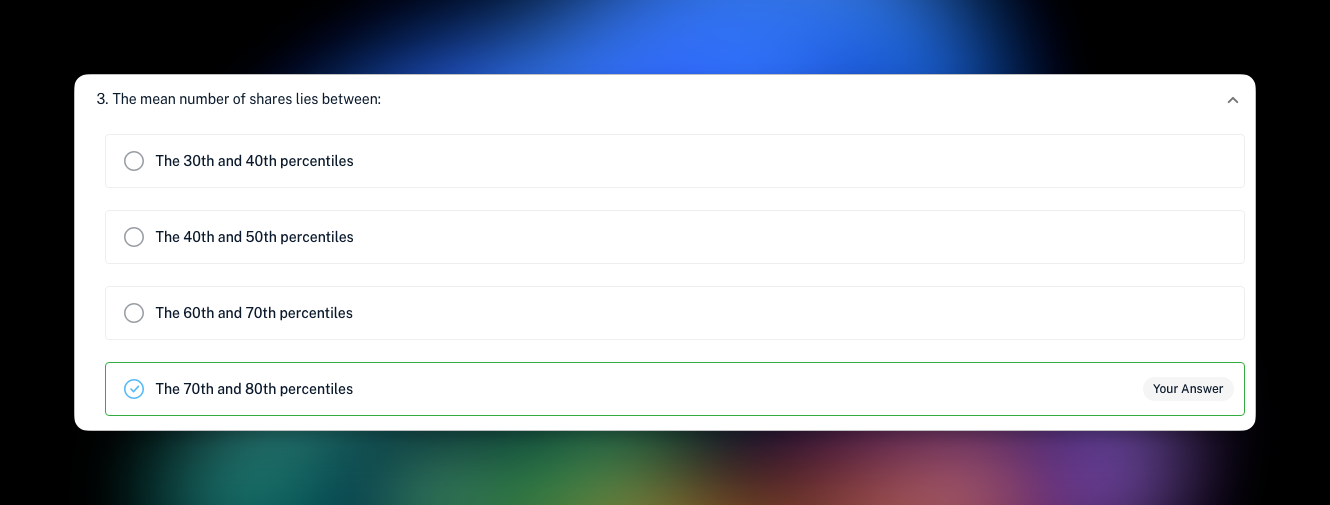

In [29]:
ShowImage("/Users/subhasishbiswas/GIT/Interstellar/UpGrad/Code/Images/CleanShot 2025-01-29 at 17.45.26.png")

In [28]:
# Define the required percentiles
percentiles = [30, 40, 50, 60, 70, 80]

# Compute the percentile values for the 'shares' column
shares_percentiles = df['shares'].quantile([p / 100 for p in percentiles])

# Define the percentile ranges based on the computed percentile values
ranges = [
    (shares_percentiles[0.3], shares_percentiles[0.4]),  # 30th to 40th percentile range
    (shares_percentiles[0.4], shares_percentiles[0.5]),  # 40th to 50th percentile range
    (shares_percentiles[0.6], shares_percentiles[0.7]),  # 60th to 70th percentile range
    (shares_percentiles[0.7], shares_percentiles[0.8]),  # 70th to 80th percentile range
]

# Print the results for each percentile range
for i, (low, high) in enumerate(ranges):
    print(f"{percentiles[i]}th to {percentiles[i+1]}th percentile: {low} to {high}")

30th to 40th percentile: 1000.0 to 1200.0
40th to 50th percentile: 1200.0 to 1400.0
50th to 60th percentile: 1800.0 to 2300.0
60th to 70th percentile: 2300.0 to 3400.0


In [18]:
import numpy as np

# Define outlier boundaries using the IQR method
Q1 = np.percentile(shares, 25)  # Calculate the 25th percentile (Q1) of shares
Q3 = np.percentile(shares, 75)  # Calculate the 75th percentile (Q3) of shares
IQR = Q3 - Q1  # Calculate the interquartile range (IQR) of shares

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound for outliers
upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound for outliers

# Remove outliers
shares_no_outliers = shares[(shares >= lower_bound) & (shares <= upper_bound)]  # Filter out outliers

# Compute the new mean after removing outliers
mean_no_outliers = np.mean(shares_no_outliers)  # Calculate the mean of shares after removing outliers

# Print the result
print(f"Mean number of shares after removing outliers: {mean_no_outliers:.2f}")  # Print the mean number of shares after removing outliers

Mean number of shares after removing outliers: 1671.97


In [19]:
import numpy as np

# Compute the standard deviation after removing outliers
std_no_outliers = np.std(shares_no_outliers, ddof=1)  # Using sample standard deviation (ddof=1)

# Print the result
print(f"Standard deviation of shares after removing outliers: {std_no_outliers:.2f}")

Standard deviation of shares after removing outliers: 1103.20


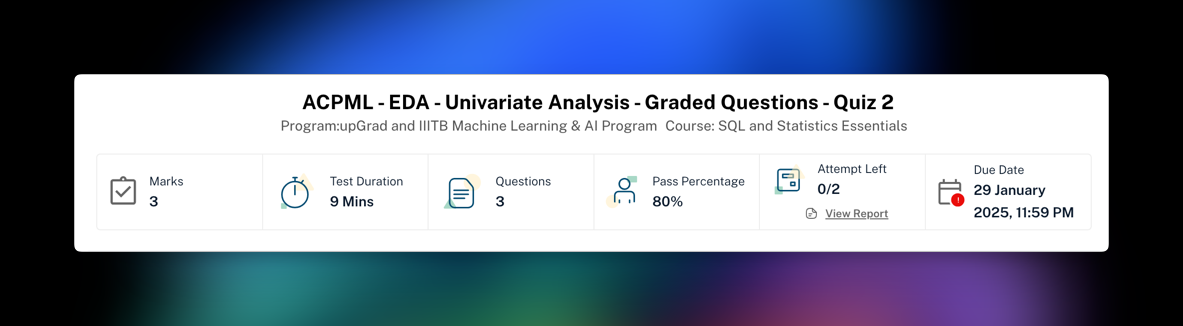

In [35]:
ShowImage("/Users/subhasishbiswas/GIT/Interstellar/UpGrad/Code/Images/CleanShot 2025-01-29 at 22.47.53.png")

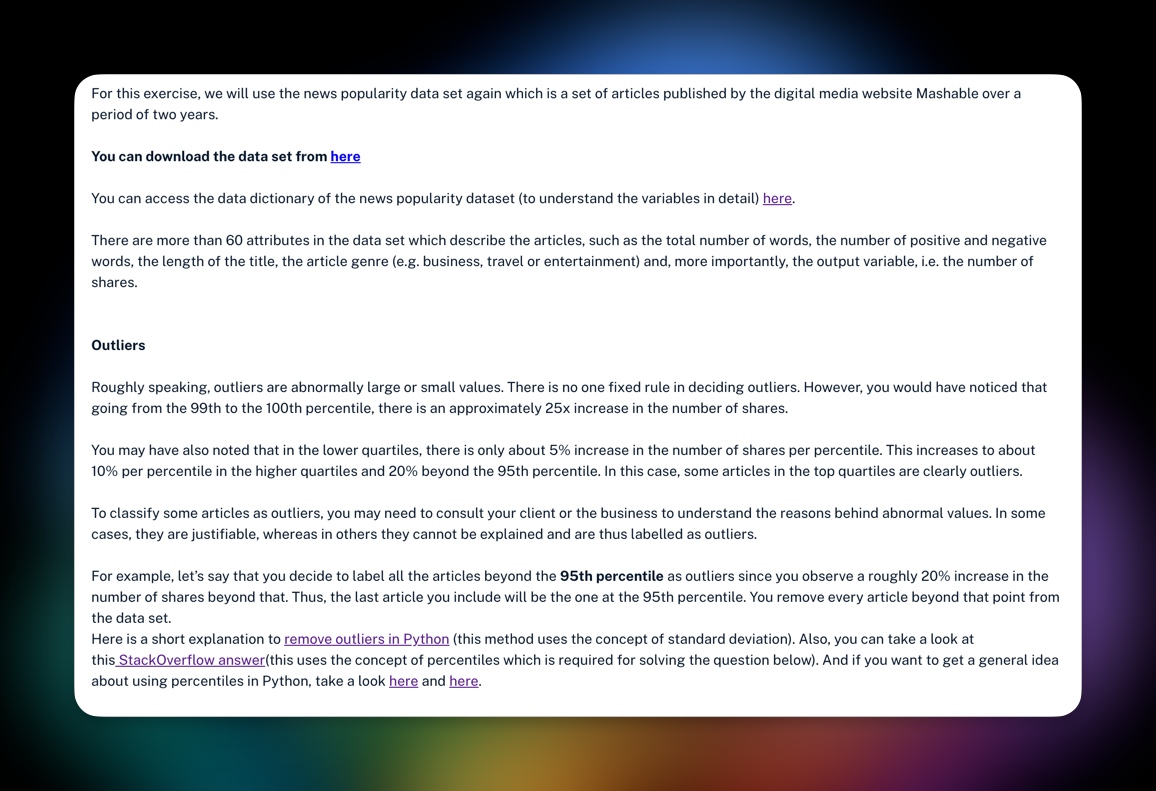

In [37]:
ShowImage("/Users/subhasishbiswas/GIT/Interstellar/UpGrad/Code/Images/CleanShot 2025-01-29 at 22.50.35.png")

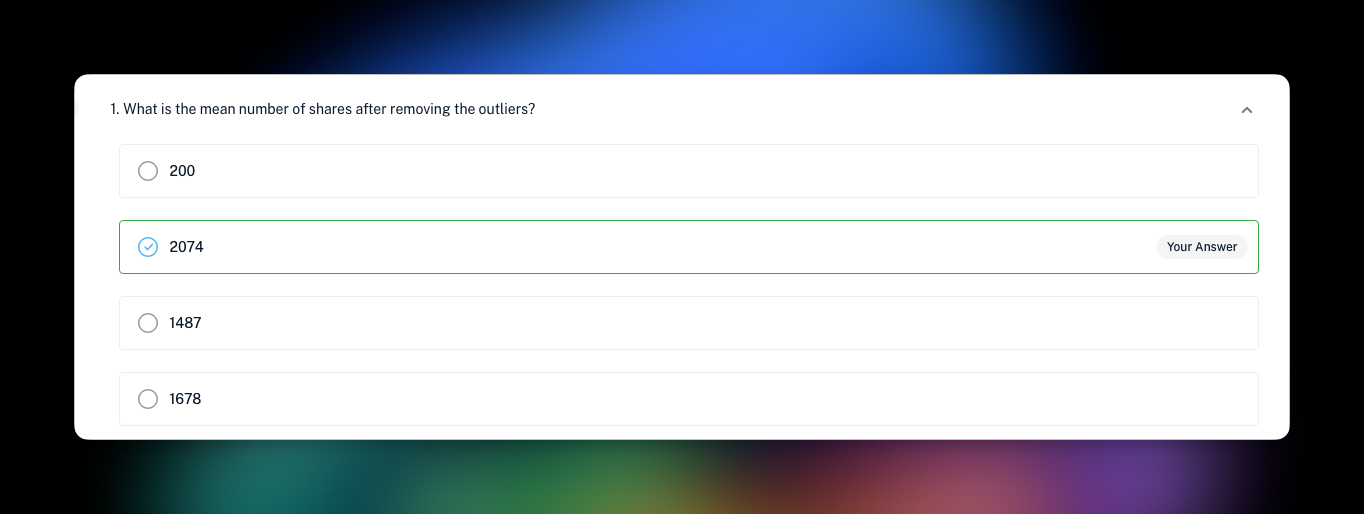

In [36]:

ShowImage("/Users/subhasishbiswas/GIT/Interstellar/UpGrad/Code/Images/CleanShot 2025-01-29 at 18.02.46.png")

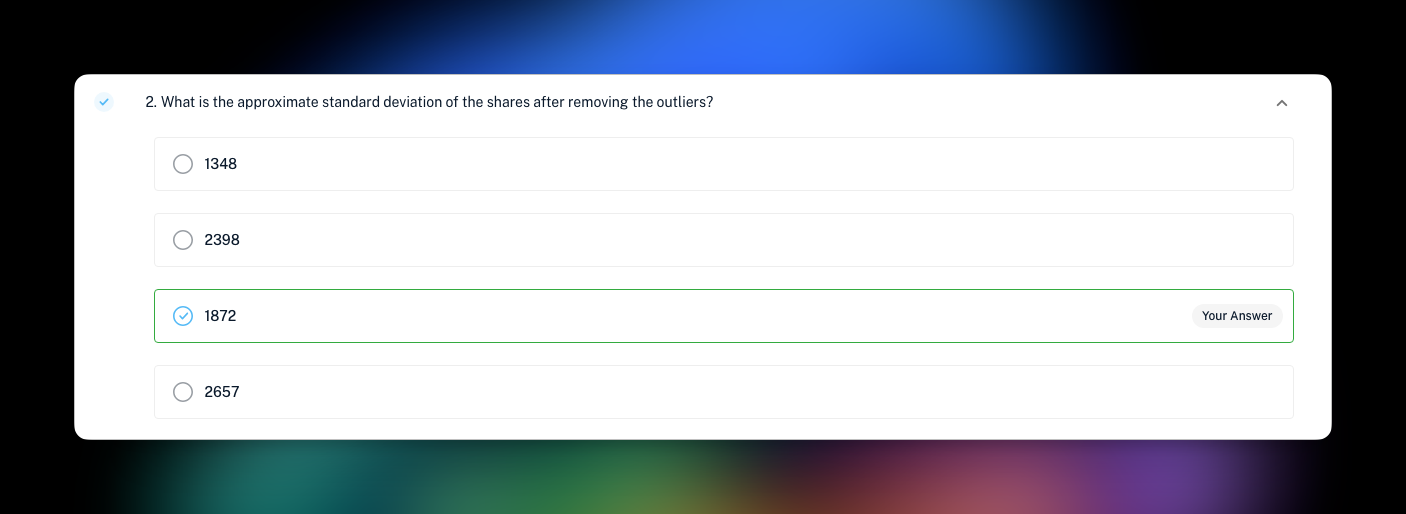

In [30]:
ShowImage("/Users/subhasishbiswas/GIT/Interstellar/UpGrad/Code/Images/CleanShot 2025-01-29 at 18.03.06.png")

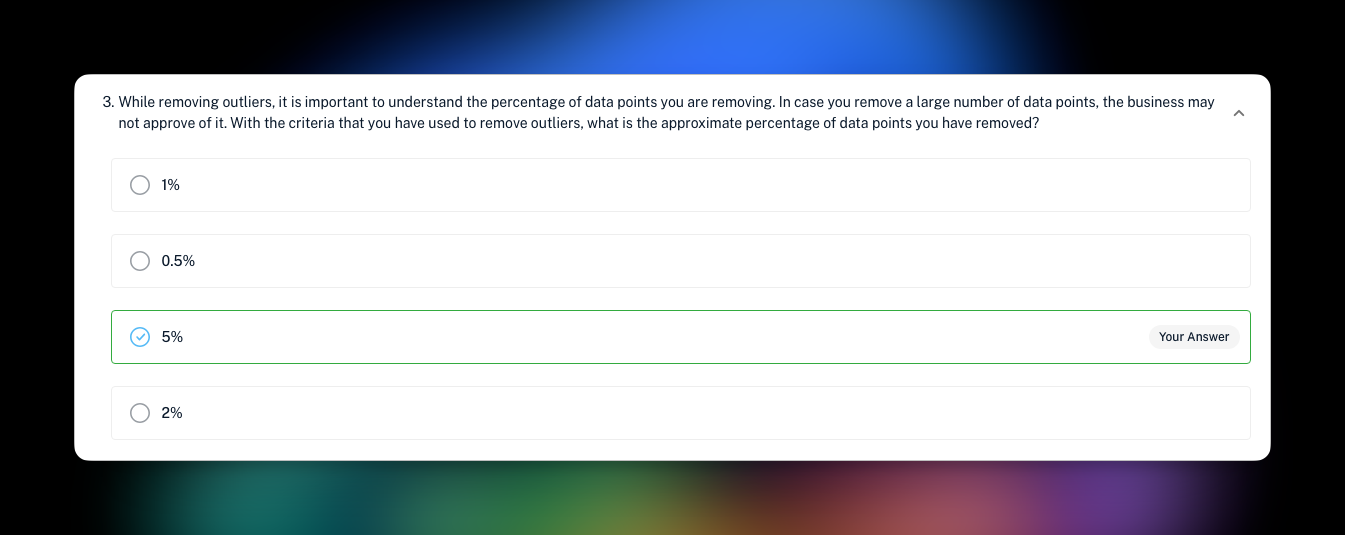

In [32]:
ShowImage("/Users/subhasishbiswas/GIT/Interstellar/UpGrad/Code/Images/CleanShot 2025-01-29 at 18.03.20.png")

In [20]:
import numpy as np

# Compute the 95th percentile threshold for the 'shares' column
percentile_95 = np.percentile(shares, 95)

# Filter out articles with shares beyond the 95th percentile
shares_no_outliers_95 = shares[shares <= percentile_95]

# Compute the total number of data points before filtering
original_count_95 = len(shares)

# Compute the total number of data points after filtering
filtered_count_95 = len(shares_no_outliers_95)

# Calculate the percentage of data points removed
percentage_removed_95 = ((original_count_95 - filtered_count_95) / original_count_95) * 100

# Compute the mean of shares after removing outliers
mean_no_outliers_95 = np.mean(shares_no_outliers_95)

# Compute the standard deviation of shares after removing outliers
std_no_outliers_95 = np.std(shares_no_outliers_95, ddof=1)

# Print the 95th percentile threshold for outliers
print(f"Threshold for Outliers (95th Percentile): {percentile_95}")

# Print the percentage of data points removed
print(f"Percentage of Data Removed: {percentage_removed_95:.2f}%")

# Print the mean of shares after removing outliers
print(f"Mean After Removing Outliers: {mean_no_outliers_95:.2f}")

# Print the standard deviation of shares after removing outliers
print(f"Standard Deviation After Removing Outliers: {std_no_outliers_95:.2f}")

Threshold for Outliers (95th Percentile): 10800.0
Percentage of Data Removed: 5.00%
Mean After Removing Outliers: 2074.33
Standard Deviation After Removing Outliers: 1871.81


In [14]:
import sys
import site

print("Python Version:", sys.version)
print("Site-packages directory:", site.getsitepackages())

Python Version: 3.12.8 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 10:37:40) [Clang 14.0.6 ]
Site-packages directory: ['/opt/anaconda3/envs/UpGrad/lib/python3.12/site-packages']
